# <div style="text-align: center">Random Forests - Hohenberg-Kohn Mapping - Solid-State</div> 
 
## <div style="text-align: center">Jon Vandermause, Steven Torrisi, Simon Batzner</div> 

## <div style="text-align: center">Potential-to-Density</div> 

In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from KRR_reproduce import *

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
# setup
ev2kcal = 1/0.043       # conversion factor
SEED = 42
SIM_NO = 201            # total number of data points
M = 180                 # number of training points

# random forest
N_ESTIMATORS = 1000     # number of trees
MAX_DEPTH = 50          # maximum depth of trees

# path to data
os.environ['PROJDIR'] = '/Users/simonbatzner1/Desktop/Research/Research_Code/ML-electron-density'
STR_PREF = os.environ['PROJDIR']+'/Aluminium_Dataset/Store/'

print("Number of estimators: {}".format(N_ESTIMATORS))
print("Maximum depth: {}".format(MAX_DEPTH))

Number of estimators: 1000
Maximum depth: 50


## Load data

In [3]:
pos = []
ens = []
fours = []

for n in range(SIM_NO):
    # load arrays
    en_curr = np.reshape(np.load(STR_PREF+'en_store/energy'+str(n)+'.npy'),(1))[0]
    pos_curr = np.load(STR_PREF+'pos_store/pos'+str(n)+'.npy')
    four_curr = np.load(STR_PREF+'four_store/four'+str(n)+'.npy')
    
    # store arrays
    ens.append(en_curr)
    pos_curr = pos_curr.flatten()
    pos.append(pos_curr)
    fours.append(four_curr)

# convert to np arrays
ens = np.array(ens)
pos = np.array(pos)
fours = np.array(fours)

In [4]:
fours_flattened = []

for n in range(SIM_NO):
    four = fours[n]
    four = four.flatten()
    four= np.absolute(four)
    fours_flattened.append(four)
    
data = pos
labels = fours_flattened

# define training and test indices
train_indices = [int(n) for n in np.round(np.linspace(0,200,M))]
test_indices = [n for n in range(201) if n not in train_indices]

if len(train_indices) != M: 
    print("Size of training set doesn't match the M specified")
    
x_train = np.array([data[n] for n in train_indices])
x_test = np.array([data[n] for n in test_indices])
y_train = np.array([labels[n] for n in train_indices])
y_test =np.array([labels[n] for n in test_indices])

# convert to np arrays
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

(180, 12)
(21, 12)
(21, 15625)


In [5]:
# train random forest
estimator = RandomForestRegressor(random_state=0, n_estimators=N_ESTIMATORS, max_depth=MAX_DEPTH)
print("Training...\n")
estimator.fit(x_train, y_train)

Training...



RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=50,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [6]:
# eval on training data
y_true_train, y_pred_train = y_train, estimator.predict(x_train)

# eval on test data
y_true, y_pred = y_test, estimator.predict(x_test)

print("Number of estimators: {}".format(N_ESTIMATORS))
print("Maximum depth: {}".format(MAX_DEPTH))
print("\nMAE on training data:\t{}".format(mean_absolute_error(y_true_train, y_pred_train)))
print("MAE on test data:\t{}".format(mean_absolute_error(y_true, y_pred)))

print("\nPredicted Fourier components:\n")
print(y_pred)

y_pot2four_pred = y_pred

Number of estimators: 1000
Maximum depth: 50

MAE on training data:	0.006612925520119559
MAE on test data:	0.018065233876692482

Predicted Fourier components:

[[  2.35109738e+03   3.10170531e+01   1.08172942e+02 ...,   7.45789057e-05
    6.64433046e-05   7.15411082e-05]
 [  2.35109734e+03   2.49864293e+01   1.08306148e+02 ...,   8.70072078e-05
    7.03976383e-05   8.07737497e-05]
 [  2.35109735e+03   4.23787168e+01   1.08015585e+02 ...,   7.24307796e-05
    6.41096599e-05   8.74225185e-05]
 ..., 
 [  2.35109734e+03   6.65265472e+01   1.10495350e+02 ...,   7.35127470e-05
    6.96304882e-05   6.12600340e-05]
 [  2.35109737e+03   4.06788204e+01   1.08249549e+02 ...,   6.24953347e-05
    1.04676565e-04   7.16160004e-05]
 [  2.35109731e+03   4.86621756e+01   1.06501972e+02 ...,   6.86090947e-05
    8.10441150e-05   7.39514858e-05]]


## <div style="text-align: center">Density-to-Energy </div> 

In [7]:
# setup
ev2kcal = 1/0.043     # conversion factor
SEED = 42
SIM_NO = 201          # total number of data points
M = 180               # number of training points

# random forest
N_ESTIMATORS = 1000   # number of treest
MAX_DEPTH = 50        # maximum depth of trees

# path to data
os.environ['PROJDIR'] = '/Users/simonbatzner1/Desktop/Research/Research_Code/ML-electron-density'
STR_PREF = os.environ['PROJDIR']+'/Aluminium_Dataset/Store/'

print("Number of estimators: {}".format(N_ESTIMATORS))
print("Maximum depth: {}".format(MAX_DEPTH))

Number of estimators: 1000
Maximum depth: 50


In [8]:
data = fours_flattened
labels = ens

# define training and test indices
train_indices = [int(n) for n in np.round(np.linspace(0,200,M))]
test_indices = [n for n in range(201) if n not in train_indices]

if len(train_indices) != M: 
    print("Size of training set doesn't match the M specified")
    
x_train = np.array([data[n] for n in train_indices])
x_test = np.array([data[n] for n in test_indices])
y_train = np.array([labels[n] for n in train_indices])
y_test =np.array([labels[n] for n in test_indices])

# convert to np arrays
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

print(x_train.shape)
print(x_test.shape)
print(y_test.shape)

(180, 15625)
(21, 15625)
(21,)


## Set up training and test data

In [9]:
# train random forest
estimator = RandomForestRegressor(random_state=0, n_estimators=N_ESTIMATORS, max_depth=MAX_DEPTH)
print("Training...\n")
estimator.fit(x_train, y_train)

Training...



RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=50,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [10]:
# eval on training data
y_true_train, y_pred_train = y_train, estimator.predict(x_train)

# eval on test data
y_true, y_pred = y_test, estimator.predict(x_test)

print("Number of estimators: {}".format(N_ESTIMATORS))
print("Maximum depth: {}".format(MAX_DEPTH))
print("\nMAE on training data in:\t{}".format(mean_absolute_error(y_true_train, y_pred_train)))
print("MAE on test data in:\t\t{}".format(mean_absolute_error(y_true, y_pred)))

print("\nPredicted Energy:\n")
y_pred[0]

Number of estimators: 1000
Maximum depth: 50

MAE on training data in:	0.010136918521160965
MAE on test data in:		0.03603922603347038

Predicted Energy:



-227.82811375434858

## Now let's compare to generated data from the first mapping

In [11]:
# eval on generated data from first mapping
y_true, y_pred = y_test, estimator.predict(y_pot2four_pred)
print("\nMAE on generated data in:\t{}".format(mean_absolute_error(y_true, y_pred)))

print("\n    Pred \t|   True\n")
print(np.c_[y_pred, y_true])


MAE on generated data in:	0.04393148594513583

    Pred 	|   True

[[-227.82370968 -227.84035463]
 [-227.83434472 -227.85027767]
 [-227.78647774 -227.74434902]
 [-227.80303628 -227.82415555]
 [-227.781948   -227.7375795 ]
 [-227.78121725 -227.60663581]
 [-227.74374695 -227.78045242]
 [-227.71939694 -227.76919887]
 [-227.77833277 -227.60566205]
 [-227.76822993 -227.77281091]
 [-227.77671314 -227.81346283]
 [-227.76658712 -227.67706435]
 [-227.78317498 -227.7940426 ]
 [-227.79517409 -227.8125088 ]
 [-227.79155773 -227.83189815]
 [-227.78309989 -227.77663656]
 [-227.77895522 -227.73537347]
 [-227.80356815 -227.84215562]
 [-227.77336781 -227.74161155]
 [-227.81747826 -227.83667483]
 [-227.75440356 -227.76402925]]


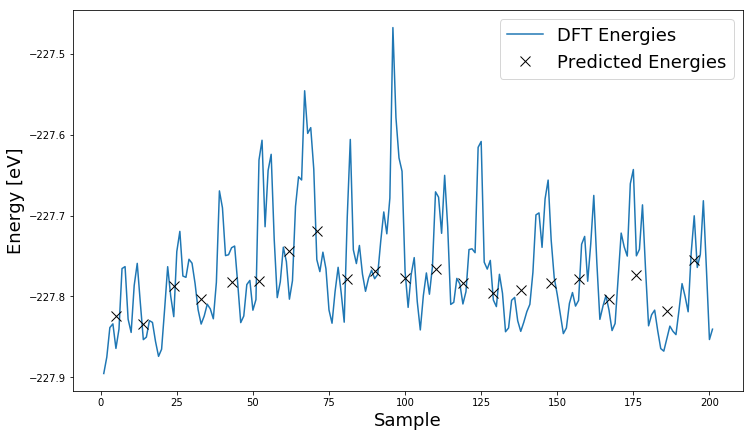

In [12]:
fig = plt.figure(figsize=(12, 7)); 
plt.plot(np.linspace(1, SIM_NO, SIM_NO), ens, label = 'DFT Energies'); 
plt.plot(test_indices, y_pred, 'kx', MarkerSize = 10, mew =1, label = 'Predicted Energies'); 
plt.legend(fontsize = 18)
plt.xlabel('Sample', fontsize = 18)
plt.ylabel('Energy [eV]', fontsize = 18)
plt.show(); 



[1] Brockherde et al. Bypassing the Kohn-Sham equations with machine learning. Nature Communications 8, 872 (2017)